In [96]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# EDA

First, we will load the data and do some rudimentary analysis through descriptive statistics and visualizations. 

In [153]:
data = pd.read_csv('recruiting_zeta-disease_training-data_take-home-challenge.csv')
predict = pd.read_csv('recruiting_zeta-disease_prediction-data_take-home-challenge.csv')
data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


An initial view of the data shows us that each row tells us an individual's health-related features, and the `zeta_disease` variable tells us whether or not they are infected with the zeta disease or not. 

## Data Quality 
Here, I will do some quick inspection to see if we have any missing data. 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


Our only null values are in our `predict` dataframe. These are the values I will aim to predict. 

In [99]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20 non-null     int64  
 1   weight              20 non-null     int64  
 2   bmi                 20 non-null     float64
 3   blood_pressure      20 non-null     int64  
 4   insulin_test        20 non-null     int64  
 5   liver_stress_test   20 non-null     float64
 6   cardio_stress_test  20 non-null     int64  
 7   years_smoking       20 non-null     int64  
 8   zeta_disease        0 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


**Takeaways:**
- No missing data in main dataframe 
- All data is numerical, with the exception of the `zeta_disease` variable which is categorical 

## Statistics
Next, we will use the `describe()` method to generate a dataframe of descriptive statistics for each of our variables. 

In [101]:
data.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [102]:
predict.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [103]:
data.zeta_disease.value_counts().to_frame()

,zeta_disease
0,521
1,279


**Takeaways:**
- All variables fall in the range [0, infinity) (except `zeta_disease`)
- Class imbalance. There are more non-infected individuals than infected in our data. Will need to mitigate this during modeling

## Visualizing Data

Next, we will make use of the `sns.pairplot()` method to visualize distributions and relationships between all variables. For our input data, we will plot against the `zeta_disease` variable, this will give us an idea of any possible trends between classes. 

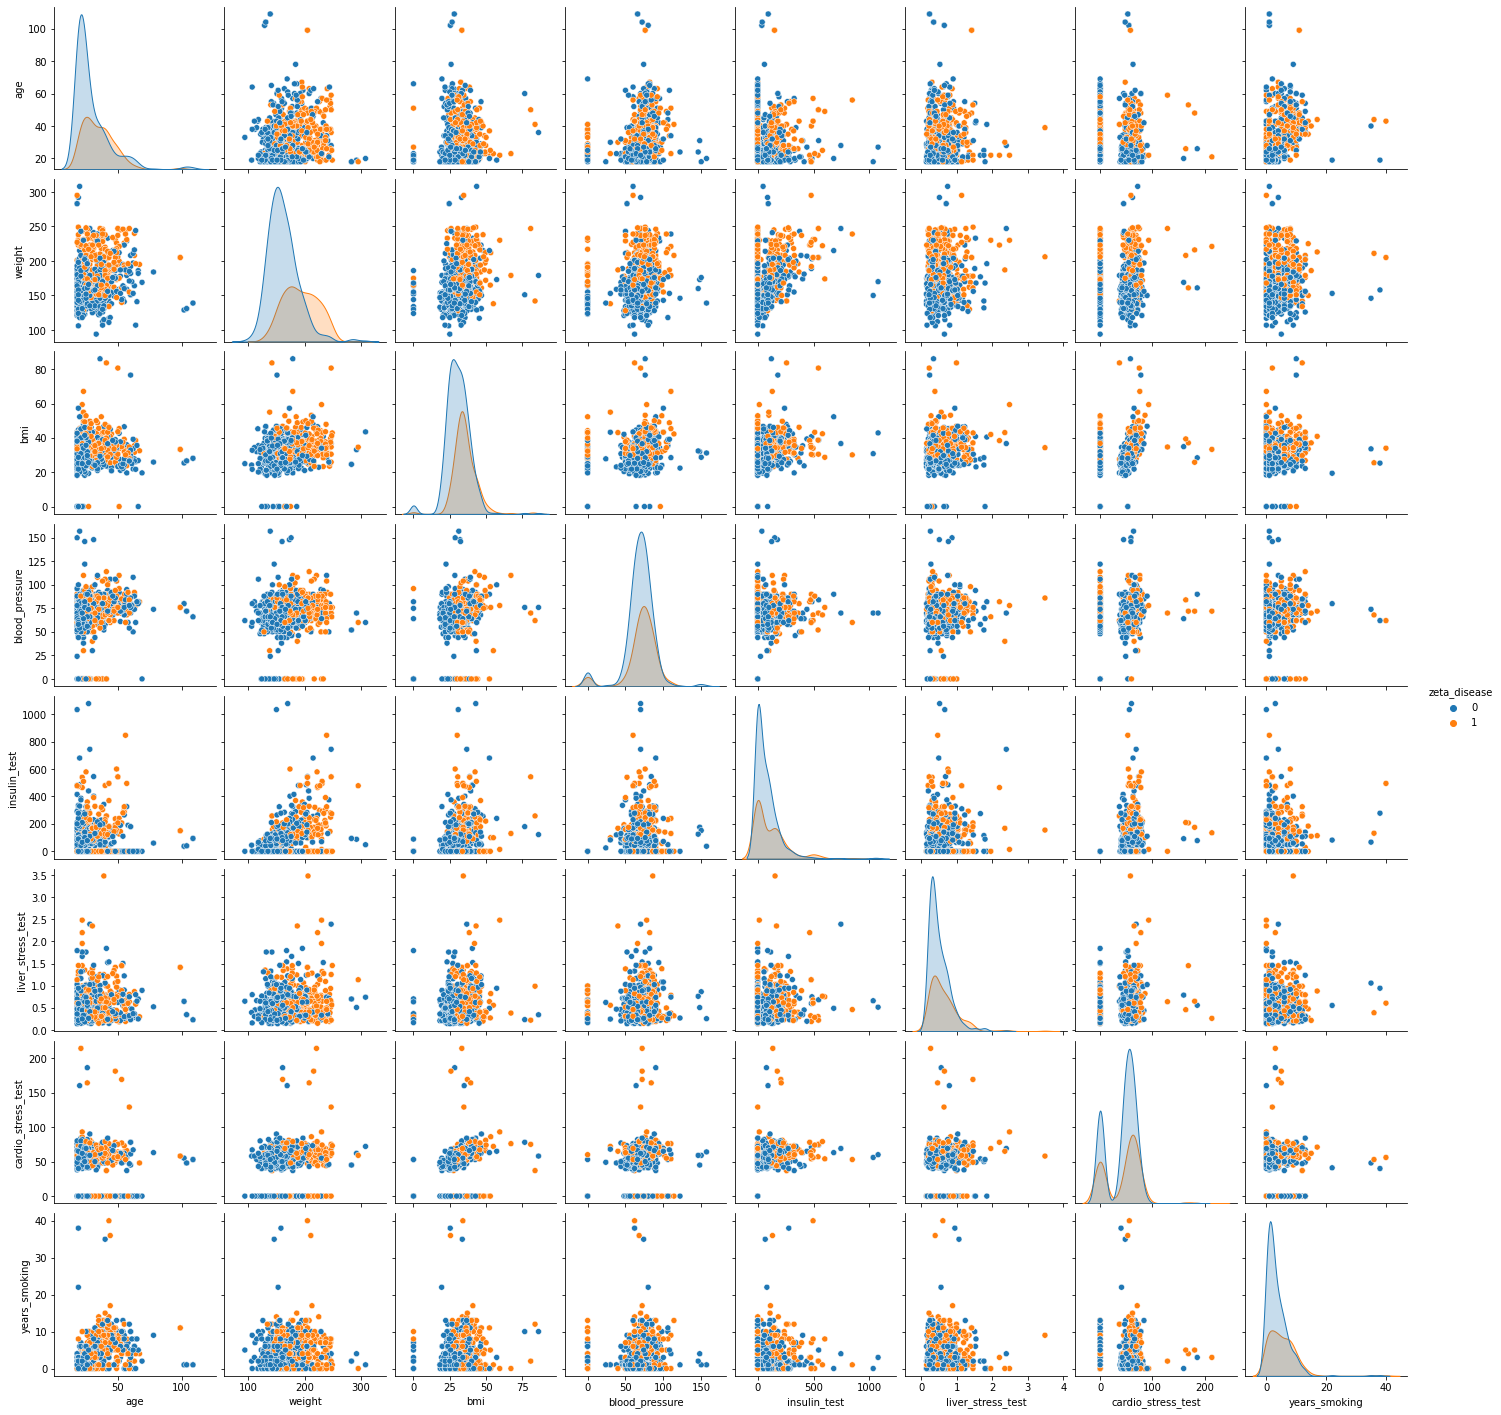

In [7]:
sns.pairplot(data, hue='zeta_disease');

**Takeaways:**
- No clear linear relationships
- Most variables are roughly normally distributed, with the exception of: 
    - `cardio_stress_test` (multi modal)
    - `insulin_test` (right tail)
    - `years_smoking` (right tail)
- Attributes between infected and non-infected patients are roughly similar. In other words, no clear separation between infection and any specific variable
    - This tells me that it would be most ideal to incorporate all variables into future models 

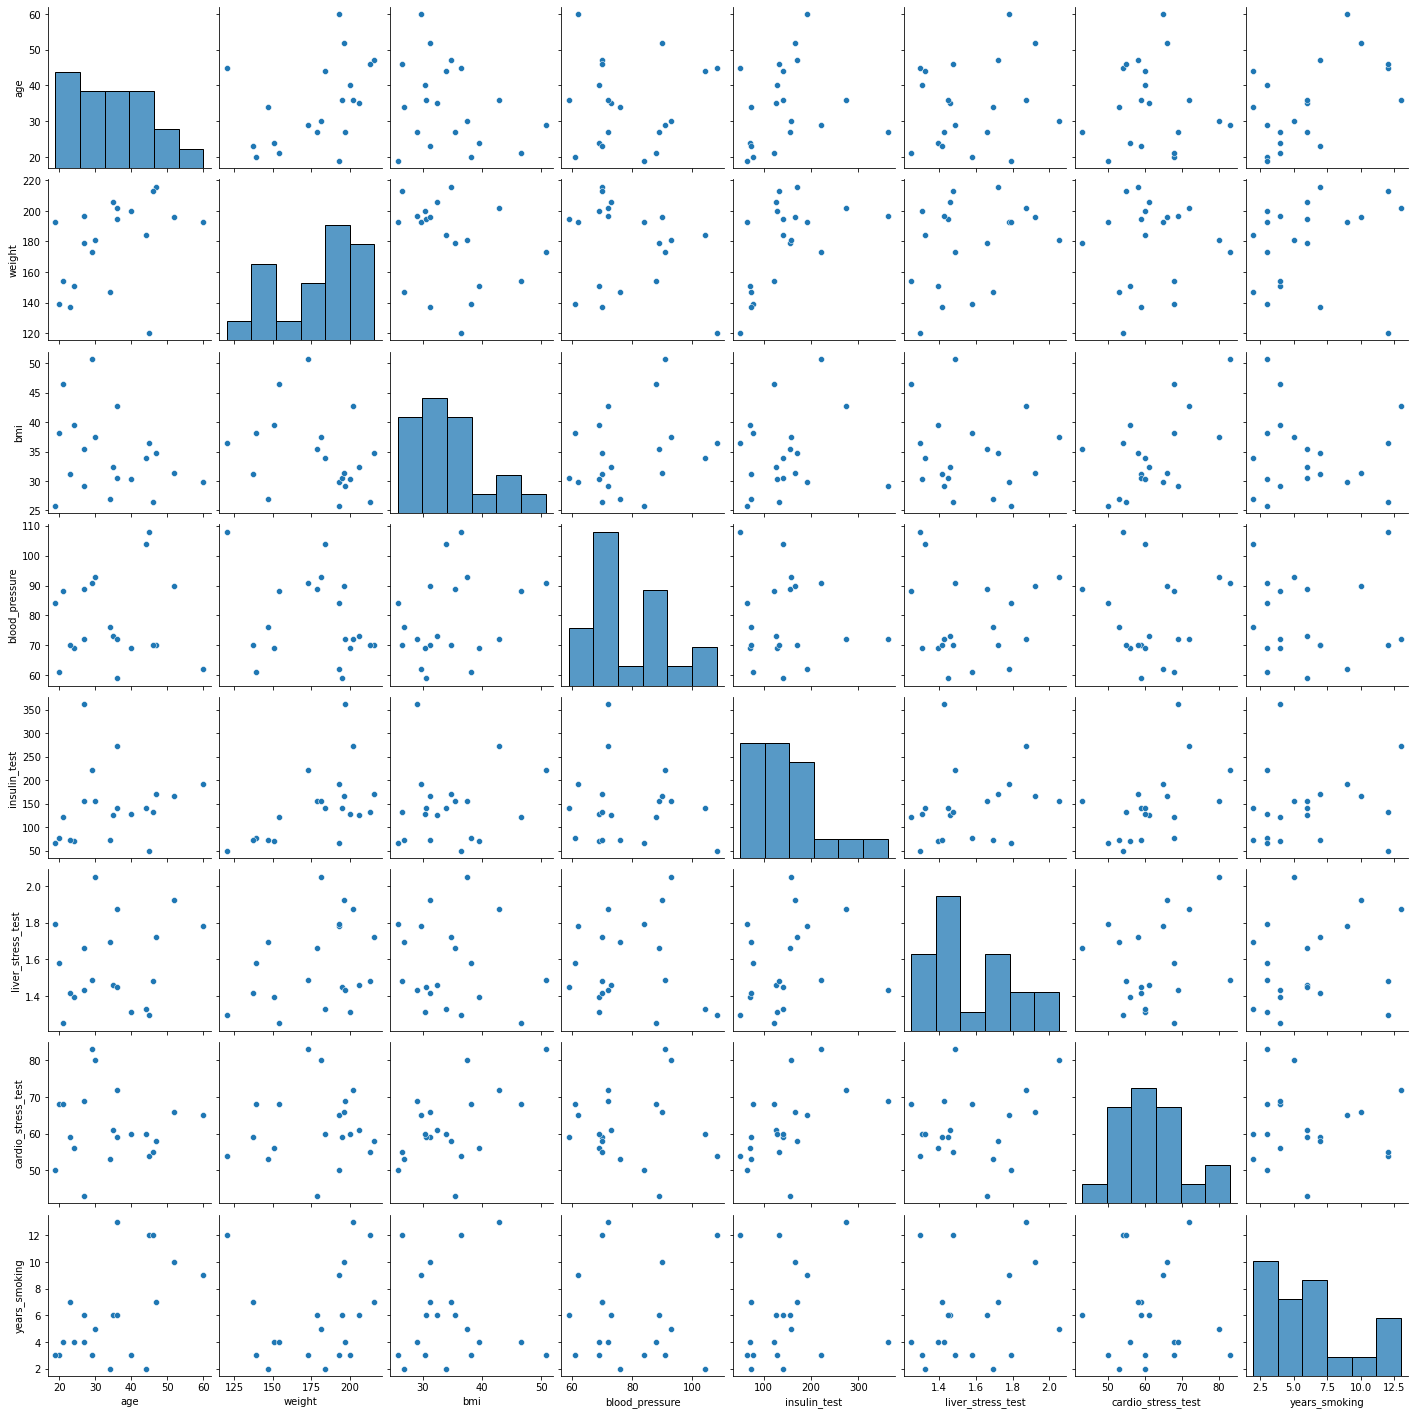

In [55]:
sns.pairplot(predict.drop('zeta_disease', axis=1));

# Modeling

I will now start modeling. Given that there are no missing values, I do not have to worry about replacing any. However, I do have to watch out for the class imbalance between infected and non-infected individuals.

Given the output variable, I will tackle this as a classification problem and start with a simple Logistic Regression model.

In [104]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             roc_auc_score, 
                             plot_roc_curve, 
                             precision_score, 
                             recall_score, 
                             f1_score)

Before I perform a train, test split, I will scale the data given the aforementioned non-normal variables. 

In [105]:
X = StandardScaler().fit_transform(data.drop('zeta_disease', axis=1))
y = data['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

I will create a utility function to fit and evaluate different models. 

In [106]:
def train_and_evaluate_model(model,
                             model_name,
                             train=X_train, 
                             train_labels=y_train, 
                             test=X_test, 
                             test_labels=y_test, 
                             roc_curve=True):
    # Fit model 
    model.fit(train, train_labels)
    
    # Predict
    y_pred = model.predict(test)
    
    # Evaluate performance 
    cm = confusion_matrix(test_labels, y_pred)
    sns.heatmap(cm, annot=True, fmt="0.0f", cmap="Greens", square=True);
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual');
    plt.xlabel('Predicted');
    
    print(f'{model_name} accuracy: {accuracy_score(test_labels, y_pred)}')
    print(f'{model_name} sensitivity: {recall_score(test_labels, y_pred)}')
    print(f'{model_name} F1 score: {f1_score(test_labels, y_pred)}')
    
    if roc_curve:
        plot_roc_curve(model, test, test_labels);

For the baseline model, we see that class imbalance is still a problem. 

In [107]:
y_test.value_counts().to_frame()

,zeta_disease
0,176
1,88


## Logistic Regression

### Baseline Model 1
The first model will be a bare-bones logistic regression model.

Baseline Logistic Regression accuracy: 0.7613636363636364
Baseline Logistic Regression sensitivity: 0.5795454545454546
Baseline Logistic Regression F1 score: 0.6181818181818182


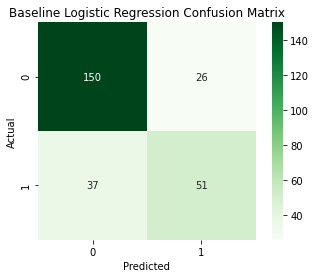

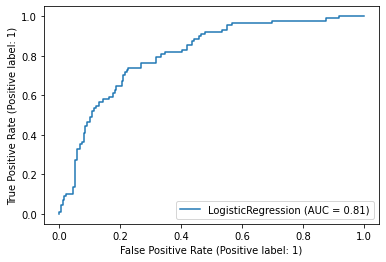

In [108]:
lr = LogisticRegression(random_state=42, max_iter=400)

train_and_evaluate_model(lr, 'Baseline Logistic Regression')

**Takeaways:**
- Decent initial accuracy of 76.1% 
- Poor performance for infected individuals at 57.9% correctly predicted
- Poor initial F1 score of 61.81%

Will this change if we perform L1 regularization?

Baseline Logistic Regression (L1 regularization) accuracy: 0.7613636363636364
Baseline Logistic Regression (L1 regularization) sensitivity: 0.5795454545454546
Baseline Logistic Regression (L1 regularization) F1 score: 0.6181818181818182


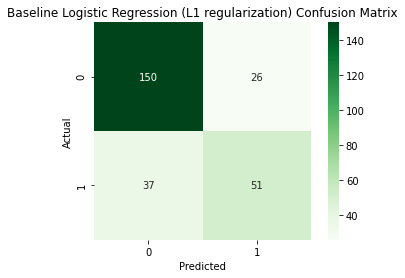

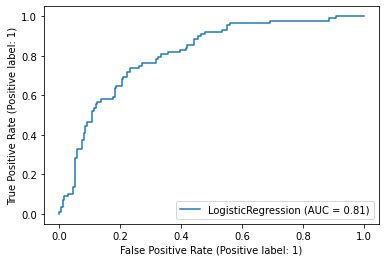

In [109]:
lr_l1 = LogisticRegression(random_state=42, max_iter=400, penalty='l1', solver='liblinear')

train_and_evaluate_model(lr_l1, 'Baseline Logistic Regression (L1 regularization)')

**Takeaways:**
- No change

## Improved Model
As we know, the other model did not account for the class imbalance. In Logistic Regression, we can make use of the `class_weight` parameter to give different weights for each class. This is commonly used to counteract the higher number of non-infected invidiuals. By default and inspired by similar work done in the past, I will assign each class to the reciprocal of that class' percentage. 

In [110]:
data.zeta_disease.value_counts().to_frame() / data.shape[0]

,zeta_disease
0,0.65125
1,0.34875


Weighted Logistic Regression accuracy: 0.75
Weighted Logistic Regression sensitivity: 0.7386363636363636
Weighted Logistic Regression F1 score: 0.663265306122449


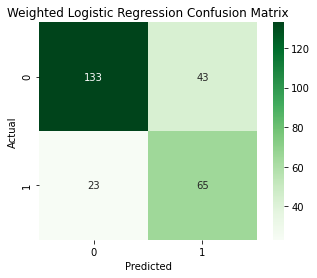

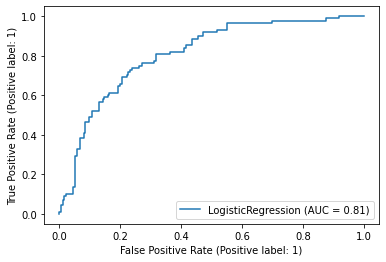

In [111]:
w = {0:35, 
     1:65}

lr_weighted = LogisticRegression(random_state=42, max_iter=400, class_weight=w)

train_and_evaluate_model(lr_weighted, "Weighted Logistic Regression")

**Takeaways:**
- Accuracy decreased by about 1% (75%), HOWEVER
- Better at predicting if an individual is infected. Increase from 57% to 73% (+16%)
- Higher F1 score. Increase from 61.81% to 66%

### Further Improvements

Does changing the default class weights improve model performance? What is the best regularization parameter? To answer these questions, I will run a simple Grid Search cross validation and obtain the optimal hyperparameters. Given that we want to improve performance for both infected and non-infected individuals, I will choose to optimize the model's f1 score. 

In [112]:
param_grid = {
    'C': [0.001, 0.01, 0.02, 0.03, 0.06, 0.1, 1], 
    'class_weight': [{1:65, 0:35}, {1:75, 0:25}, {1:60, 0:40}, {1:85, 0:15}]
             }

gcv = GridSearchCV(LogisticRegression(max_iter=400), 
                   param_grid, 
                   scoring='f1', 
                   cv=100)

gcv.fit(X_train, y_train)

GridSearchCV(cv=100, estimator=LogisticRegression(max_iter=400),
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.06, 0.1, 1],
                         'class_weight': [{0: 35, 1: 65}, {0: 25, 1: 75},
                                          {0: 40, 1: 60}, {0: 15, 1: 85}]},
             scoring='f1')

In [113]:
gcv.best_params_

{'C': 0.06, 'class_weight': {1: 75, 0: 25}}

Do these supposed optimal hyperparameters improve model performance?

Logistic Regression w/ CV parameters accuracy: 0.696969696969697
Logistic Regression w/ CV parameters sensitivity: 0.8068181818181818
Logistic Regression w/ CV parameters F1 score: 0.6396396396396395


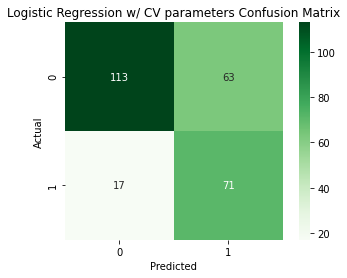

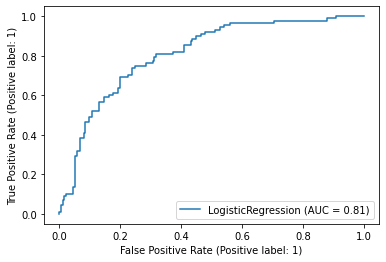

In [114]:
lr_cv = LogisticRegression(max_iter=400, 
                           class_weight=gcv.best_params_['class_weight'], 
                           C=gcv.best_params_['C'])

train_and_evaluate_model(lr_cv, "Logistic Regression w/ CV parameters")

**Takeaways:**
- Lowest accuracy (69%), HOWEVER
- The best at predicting if an individual is infected. Increase from 73% to 80.6% (+7%)
- Lower F1 score. Decrease from to 66% to 63%, but higher than baseline (61%)

It seems that a Logistic Regression model provides decent results, however, there is much room for improvement. I will experiment with a more involved model in the following sections. 

## Neural Net

A neural net might capture any non-linear relationships better a Logistic Regression model. A downside, however, is the higher computational burden when dealing with larger data. Nonetheless, I'd like to see how a bare-bones neural net compares to our Logistic Regression models. 

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

To deal with class imbalance for our neural net, I will change my method to upsample the minority class (infected invididuals). This aims to mitigate the lower number of infected invididuals in our data. For this, I will resample with replacement from the set of infected invididuals and try to obtain an equal amount as the non-infected group. 

In [116]:
from sklearn.utils import resample

no_disease = data[data.zeta_disease==0]
disease = data[data.zeta_disease==1]

disease_upsampled = resample(disease, replace=True, n_samples=no_disease.shape[0]) 
upsampled_data = pd.concat([no_disease, disease_upsampled])

upsampled_data.zeta_disease.value_counts()

X_nn = StandardScaler().fit_transform(upsampled_data.drop('zeta_disease', axis=1))
y_nn = upsampled_data['zeta_disease']

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.33, random_state=42)

Here, I define a function to compile the baseline neural net. I've built the network as such:
- The input shape is (8,) as we have 8 input features. ReLU activation to capture any non-linearities
- Dropout layer to reduce overfitting
- Our output will be the probability that a given individual is infected. 

For ease of time, I will use the accuracy metric, this might be a flawed metric to use but keras does not contain a quick and easy f1 score metric. Given more time, I'd incorporate my own function and use that as the metric for the model. Nonetheless, I can compare accuracies and plot a confusion matrix to view the number of correct predictions by class. 

In [121]:
def baseline_nn():
    
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", metrics=['accuracy'])
    
    return model

I will set the default number of epochs to be 50, and the batch size to be 15. Further improvements can tweak these parameters through GridSearch similar as above. For time's sake, I will leave them as is, but I recognize that they can be optimized. 

In [122]:
baseline = baseline_nn()

history = baseline.fit(X_train_nn,
                       y_train_nn,
                       epochs=50, 
                       batch_size=15,
                       validation_split=0.33, 
                       shuffle=True,
                       verbose=0)

Now, I will plot the performance of the model throughout training time. This will serve as a small sanity check to verify that the model is learning. 

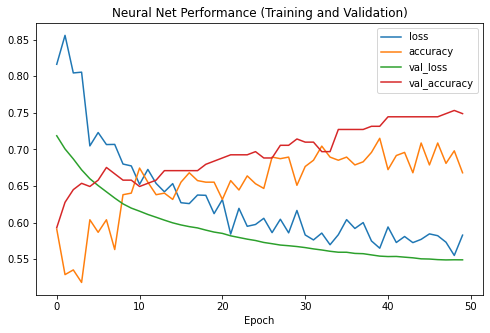

In [123]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('Neural Net Performance (Training and Validation)')
plt.xlabel('Epoch')
plt.show()

How does this neural net perform against the test set?

In [124]:
test_loss, test_accuracy = baseline.evaluate(X_test_nn, y_test_nn)
print(f"NN Model Test Accuracy: {test_accuracy}")

11/11 [==============================] - 0s 902us/step - loss: 0.4848 - accuracy: 0.7849
NN Model Test Accuracy: 0.7848837375640869


Neural Net accuracy: 0.7848837209302325
Neural Net sensitivity: 0.8048780487804879
Neural Net F1 score: 0.7810650887573964
Neural Net AUC score: 0.7857723577235771


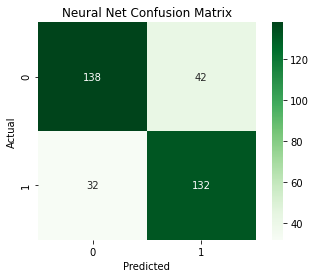

In [125]:
predictions = baseline.predict(X_test_nn)
y_pred_nn = [1 * (i[0]>=0.5) for i in predictions]
model_name = "Neural Net"

cm = confusion_matrix(y_test_nn, y_pred_nn)
sns.heatmap(cm, annot=True, fmt="0.0f", cmap="Greens", square=True);
plt.title(f'{model_name} Confusion Matrix')
plt.ylabel('Actual');
plt.xlabel('Predicted');

print(f'{model_name} accuracy: {accuracy_score(y_test_nn, y_pred_nn)}')
print(f'{model_name} sensitivity: {recall_score(y_test_nn, y_pred_nn)}')
print(f'{model_name} F1 score: {f1_score(y_test_nn, y_pred_nn)}')
print(f'{model_name} AUC score: {roc_auc_score(y_test_nn, y_pred_nn)}')

How does this performance compare against a Logistic Regression model with the same input data? (Upsampled so that there are equal number of infected vs. non-infected invididuals)

Logistic Regression w Upsampled Data accuracy: 0.7645348837209303
Logistic Regression w Upsampled Data sensitivity: 0.7560975609756098
Logistic Regression w Upsampled Data F1 score: 0.7537993920972644


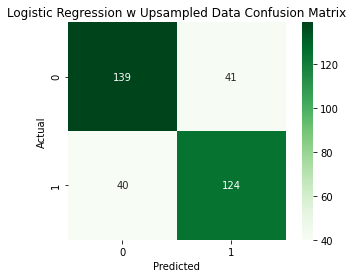

In [127]:
lr_nn = LogisticRegression(max_iter=400, 
                           class_weight=None)

train_and_evaluate_model(lr_nn, 
                         "Logistic Regression w Upsampled Data",
                         train=X_train_nn, 
                         train_labels=y_train_nn, 
                         test=X_test_nn, 
                         test_labels=y_test_nn,
                         roc_curve=False)

**Takeaways**:
- Neural net has the 
    - Highest accuracy of all models: 78% (2% increase from previous highest) 
    - High sensitivity to capture a truly infected invididual (80%, similar to the weighted logistic regression)
    - Highest F1-score of 78%
- Logistic regression with upsampled data performs almost as well as the neural net

# Predicting

Now that we've done some modeling, let us use the best logistic regression and our neural net to predict infections in our `predict` table. 

In [132]:
features = predict.drop('zeta_disease', axis=1)
features

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9
5,45,120,36.5,108,50,1.2978,54,12
6,20,139,38.2,61,77,1.5818,68,3
7,23,137,31.2,70,73,1.4168,59,7
8,36,195,30.5,59,141,1.4498,59,6
9,19,193,25.8,84,66,1.7938,50,3


In [133]:
scaled_features = StandardScaler().fit_transform(features)
scaled_features.shape

(20, 8)

In [147]:
lr_predictions = lr_nn.predict(scaled_features)
nn_predictions = np.array([1 * (i[0]>0.5) for i in baseline.predict(scaled_features)])

predict_copy = predict.copy()

predict_copy['zeta_disease_lr_pred'] = lr_predictions
predict_copy['zeta_disease_nn_pred'] = nn_predictions
predict_copy['same_prediction'] = (predict_copy['zeta_disease_lr_pred'] == predict_copy['zeta_disease_nn_pred'])
predict_copy

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,zeta_disease_lr_pred,zeta_disease_nn_pred,same_prediction
0,24,151,39.5,69,72,1.3968,56,4,NaN,0,0,True
1,27,179,35.5,89,156,1.6608,43,6,NaN,1,0,False
2,34,147,26.9,76,74,1.6958,53,2,NaN,0,0,True
3,35,206,32.4,73,127,1.4608,61,6,NaN,1,1,True
4,60,193,29.8,62,192,1.7798,65,9,NaN,1,1,True
5,45,120,36.5,108,50,1.2978,54,12,NaN,0,0,True
6,20,139,38.2,61,77,1.5818,68,3,NaN,0,0,True
7,23,137,31.2,70,73,1.4168,59,7,NaN,0,0,True
8,36,195,30.5,59,141,1.4498,59,6,NaN,1,1,True
9,19,193,25.8,84,66,1.7938,50,3,NaN,0,0,True


# Conclusion

Using the models we created, I predicted infection among individuals in our `predict` table. I added both sets of predictions as distinct columns, and generated an extra column to show me where both models agreed or disagreed.  

Below, we can see that they disagreed twice, but interestingly, the number of predicted infected individuals was the same between both models. 

In [150]:
predict_copy.same_prediction.value_counts().to_frame()

,same_prediction
True,18
False,2


In [151]:
predict_copy.zeta_disease_lr_pred.value_counts().to_frame()

,zeta_disease_lr_pred
1,11
0,9


In [152]:
predict_copy.zeta_disease_nn_pred.value_counts().to_frame()

,zeta_disease_nn_pred
1,11
0,9


Moving forward, I can see myself creating a series of models for binary classification, and then use these models in an **ensembled-learning** setting.